# libs

In [ ]:
!pip install persiantools

In [1]:
import math
import numpy as np
import itertools
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from persiantools.jdatetime import JalaliDate

# hidden variables

In [2]:
max_raas_days = 65
max_discount_percentage = 20 / 100 # 20%

acceptable_periods = [15, 20, 25, 30, 45, 60]

In [16]:
def calculate_raas_days(total_amount, cash_amount, check_payments):    
    weighted_sum = 0
    for days, amount in check_payments:
        weighted_sum += days * amount
    raas_days = weighted_sum / total_amount
    return round(raas_days)

calculate_raas_days(1500, 300, [[30, 500], [60, 500], [90, 300]])

48

In [4]:
# دیرکرد هم حساب بشه
def get_discount(raas_day):
    if raas_day < 5:
        return 20
    if raas_day < 10:
        return 19.5
    if raas_day < 15:
        return 19
    if raas_day < 20:
        return 18.25
    if raas_day < 25:
        return 17.5
    if raas_day < 30:
        return 16.25
    if raas_day < 35:
        return 15
    if raas_day < 40:
        return 13.5
    if raas_day < 45:
        return 12
    if raas_day < 50:
        return 10
    if raas_day < 55:
        return 8
    if raas_day < 60:
        return 5.5
    if raas_day < 65:
        return 3
    if raas_day < 70:
        return 0        
    return get_discount(65 - (raas_day - 65))

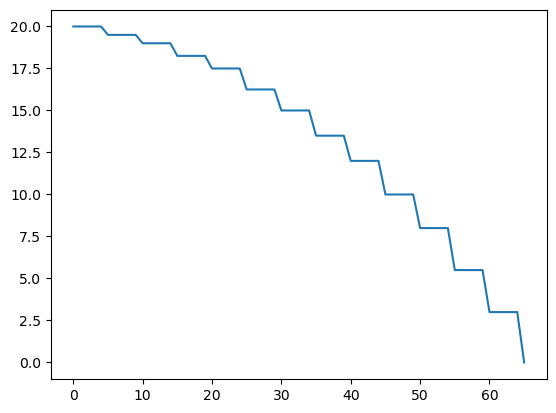

In [5]:
index = [i for i in range(0, 66)]
value =[get_discount(i) for i in index]
plt.plot(index, value)
plt.show()

In [6]:
def generate_check_combinations(check_number, duration_days):
    # Generate combinations of check distributions using only acceptable periods
    combinations = []
    for combo in itertools.product(acceptable_periods, repeat=check_number):
        if sum(combo) <= duration_days:            
            periods = [sum(combo[:i]) for i in range(check_number+1)]            
            combinations.append(periods[1:])    
    print(len(combinations))
    return combinations

In [7]:
def disp(plan):    
    print("cash_amount", plan['cash_amount'])    
    print("raas_days", plan['raas_days'])
    print("discount", str(plan['discount'] * 100) + "%")
    print("combination", plan['combination'])
    for check in plan['checks']:
        #formatted_date = check[0].strftime("%Y,%m,%d")
        formatted_date = JalaliDate.to_jalali(check[0]).strftime("%Y,%m,%d")
        print((formatted_date, check[1]))

In [11]:
def score(combination, duration_days):
    w_balance = 0.2
    w_duration = 0.8
    
    # balance score
    if len(combination) < 2:
        return 0    
    diffs = combination.copy()
    for i in range(len(diffs)-1, 0,-1):
        diffs[i] -= diffs[i-1]                
    variance = np.var(diffs)        
    balance_score = 1 / (1 + variance)        
    # durarion score
    duration_score = combination[-1] / duration_days
    return w_balance * balance_score + w_duration * duration_score

def suggest_payment_plans(total, cash_amount, check_number, duration_days):
    # check is this acceptable
    if cash_amount >= total:
        return "No checks needed, the entire amount is paid in advance."
    
    check_amount = (total - cash_amount) / check_number
    combinations = generate_check_combinations(check_number, duration_days)
    
    valid_plans = []
    
    for combination in combinations:
        check_payments = [(day, check_amount) for day in combination]                
        print(check_payments)
        raas_days = calculate_raas_days(total, cash_amount, check_payments)
        # filter by duration_days
        if raas_days == max_raas_days:
            discount = get_discount(raas_days) / 100            
            total_after_discount = total * (1 - discount)                                    
            net_check_amount = (total_after_discount - cash_amount) / check_number            
            start_date = datetime.today()
            check_dates = [(start_date + timedelta(days=day), net_check_amount) for day in combination]                                
            plan = {
                "cash_amount": cash_amount,
                "discount": discount,
                "checks": check_dates,
                "raas_days": raas_days,
                "combination": combination
            }                                    
            valid_plans.append(plan)
    sorted_plans = sorted(valid_plans, key=lambda x: score(x['combination'], duration_days), reverse=True)
    return sorted_plans

##### خورد ها اولین چک باشه

In [12]:
# بقیه چک ها به میلیون باش

In [13]:
["4/1", "5/1", "6/1", "7/1", "8/1", "9/1", "9/30"]

['4/1', '5/1', '6/1', '7/1', '8/1', '9/1', '9/30']

In [14]:
از ۲۰ تا ۲۵ روز بعد از شروع فاکتور باشه
تاریخ چک های تولید شده توی تاریخ های روند ماه باشه.
30 => 

SyntaxError: invalid character '۲' (U+06F2) (4097778931.py, line 1)

In [15]:
million = 10**6
total = 100 * million
cash_amount = 40 * million
check_number = 5
duration_days = 6 * 30

suggested_plan = suggest_payment_plans(total, cash_amount, check_number, duration_days)
print("total answer:", len(suggested_plan))
print()
print("===============================================")
print()

for plan in suggested_plan:
    disp(plan)
    print()
    print("===============================================")
    print()

5634
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (60, 12000000.0), (75, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (60, 12000000.0), (80, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (60, 12000000.0), (85, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (60, 12000000.0), (90, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (60, 12000000.0), (105, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (60, 12000000.0), (120, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (65, 12000000.0), (80, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (65, 12000000.0), (85, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (65, 12000000.0), (90, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (65, 12000000.0), (95, 12000000.0)]
[(15, 12000000.0), (30, 12000000.0), (45, 12000000.0), (65, 12000000.0), (110, 1200

In [37]:
80 / 3

26.666666666666668

### امروز کی هست رو به من میگید

# چک ها باید مضربی از ۵ باشه برای ماه

### هر ماهی که هستیم خودش ۱ ماه حساب میشه

In [ ]:
### حداقلترین بازه اولین چک باید ۲۰ روز بعد باشه

### بازه قیمت ها بتونه بشکنه
### سعی بشه قیمت ها برابر بشه

In [ ]:
### بر اساس راس نشون بده